<a href="https://colab.research.google.com/github/karinaah/NLP-inicios/blob/main/Mineria_Sec3_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar librerias
import numpy as np
import pandas as pd
from plotnine import *
import sklearn
import plotnine as ptn
import warnings
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
import datetime
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import seaborn as sns
from sklearn.datasets import make_blobs
import csv
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import plotly.offline as pyo
import plotly.graph_objects as go
import math as mt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from random import sample
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import scipy.stats as st
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.stats import f_oneway
from scipy.stats import bartlett
from kmodes.kmodes import KModes
from sklearn import preprocessing
from sklearn import tree
from sklearn import datasets 

# Omite Warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
#importacion de datos
df= pd.read_csv("datosCasas.csv",sep=",",decimal=".")

#limpieza de datos
date_format = "%Y%m%dT%H%M%S" 
df=df.drop_duplicates(subset=["id"])
df=df.dropna()
df=df.drop(["zipcode", "sqft_living15", "sqft_lot15","id"], axis=1)
df["date"]=list(map(lambda x: datetime.datetime.strptime(x,date_format).strftime('%d/%m/%Y'), df['date']))
df.bathrooms=pd.Series(df['bathrooms'], dtype = 'int64')   
for i in df.index:
    if (df.loc[i, "bedrooms"] == 33):
        df = df.drop([i], axis=0)#limpiar datos de casa con piezas malas

for i in df.index:        
    if (df.loc[i, "bedrooms"] and df.loc[i, "bathrooms"]) == 0:
        df = df.drop([i], axis=0)#limpiar datos de 0 baños y 0 piezas

KMeans

In [ ]:
# Creo objeto KMeans con las condiciones iniciales
km = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300, tol=0.0001, random_state=None)
df=df.drop(["date"], axis=1)
km=km.fit(df)
# Creando DataFrames con df y las Etiquetas del Cluster obtenido
tempDF = pd.DataFrame(df,columns=df.columns)
tempDF['labels'] = km.labels_
tempDF.head(5)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'labels'],
      dtype='object')

In [ ]:
tempDF2 = pd.DataFrame(km.cluster_centers_,columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long'])
tempDF2['labels'] = range(km.n_clusters)

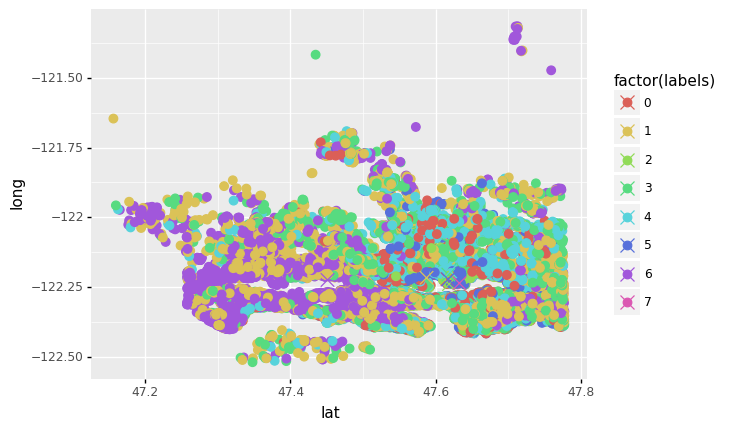

<ggplot: (8781734052828)>

In [ ]:
# Plot de los datos y centro de los clusters
ggplot(tempDF) + aes(x="lat", y="long",color="factor(labels)") + geom_point(size=3) + geom_point(data=tempDF2,shape="x",size=5)

In [ ]:
#determinacion de k optimo
sse = [] 

# número de cluster a probar (entre 2 y 11 conglomerados)
for k in range(1, 15): 
    # Creando el modelo, entrenandolo y obteniendo el valor del within cluster distance
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

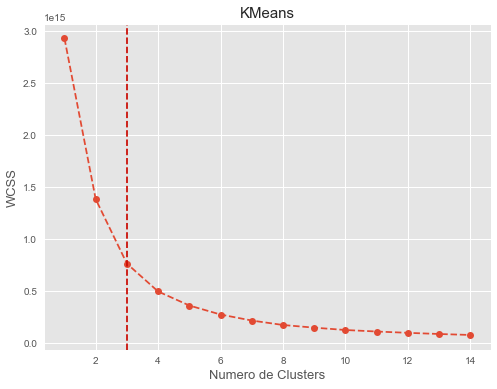

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,15), sse, marker='o',linestyle='--')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('KMeans',fontsize=15)
plt.xlabel('Numero de Clusters',fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()

Utilizando Yellowbrick https://www.scikit-yb.org/en/latest/, se puede ver que el punto de inflexión para el conjunto de datos entrenados, es en k=3

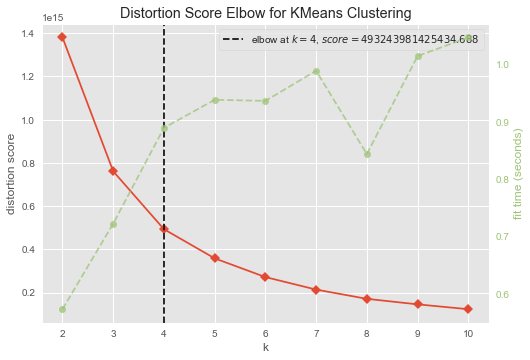

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(df)    # Entrena los datos para la visualizacion
visualizer.poof()            # Visualizacion

In [ ]:
# Entreno el modelo con K=3 y genero nueva visualizacion.
kmeans   = KMeans(n_clusters = 3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

# Genero etiquetas para la nueva visualizacion
tempDF = pd.DataFrame(df, columns = df.columns)
tempDF['labels'] = kmeans.labels_
tempDF.head(5)

# Creando data frame con los centros y etiquetas para la nueva visualizacion
tempDF2 = pd.DataFrame(kmeans.cluster_centers_,columns=df.columns)
tempDF2['labels'] = range(kmeans.n_clusters)
tempDF2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,labels
0,3.756033e+05,3.203200,1.570142,1744.410365,12781.090072,1.413087,0.001008,0.095651,3.388788,7.226255,1519.427707,224.982658,1970.573167,58.532634,47.534287,-122.218772,0
1,2.032730e+06,4.183333,3.090000,4335.730000,28210.091667,1.864167,0.133333,1.531667,3.478333,10.260000,3544.020000,791.710000,1975.091667,289.748333,47.617097,-122.225398,1
2,8.096164e+05,3.737219,2.100716,2726.274369,19727.974949,1.673824,0.010566,0.454158,3.458589,8.529312,2312.956033,413.318337,1972.352420,130.143490,47.620276,-122.199883,2


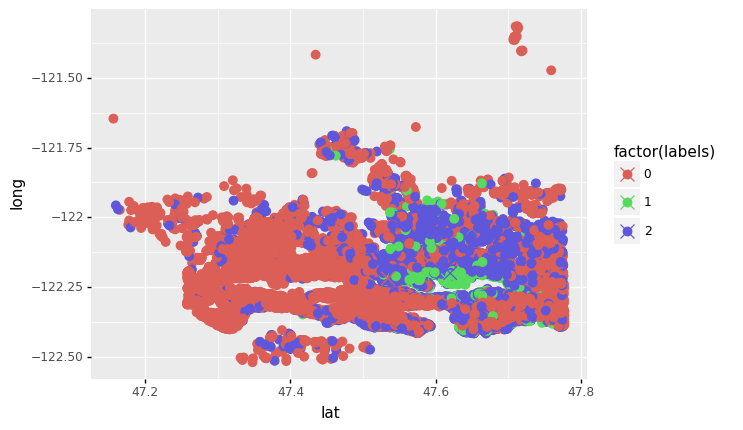

<ggplot: (8781733431022)>

In [ ]:
# Plot de los datos y centro de los clusters
ggplot(tempDF) + aes(x="lat", y="long",color="factor(labels)") + geom_point(size=3) + geom_point(data=tempDF2,shape="x",size=5)

In [ ]:
# Entreno el modelo con K=4 y genero nueva visualizacion.
kmeans   = KMeans(n_clusters = 4,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

# Genero etiquetas para la nueva visualizacion
tempDF = pd.DataFrame(df, columns = df.columns)
tempDF['labels'] = kmeans.labels_
tempDF.head(5)

# Creando data frame con los centros y etiquetas para la nueva visualizacion
tempDF2 = pd.DataFrame(kmeans.cluster_centers_,columns=df.columns)
tempDF2['labels'] = range(kmeans.n_clusters)
tempDF2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,labels
0,2.806109e+06,4.352632,3.526316,5094.152632,23010.052632,1.881579,0.236842,2.010526,3.505263,10.752632,4058.752632,1035.400000,1972.257895,305.078947,47.619356,-122.239132,0
1,3.463222e+05,3.169433,1.537112,1684.687285,12025.928672,1.391325,0.000940,0.079784,3.385687,7.140855,1475.986611,208.700673,1970.571719,56.783902,47.521166,-122.220226,1
2,1.358140e+06,4.040984,2.675410,3630.651639,23325.022131,1.801639,0.048361,1.121311,3.464754,9.634426,2986.065574,644.586066,1975.233607,235.931967,47.616521,-122.220319,2


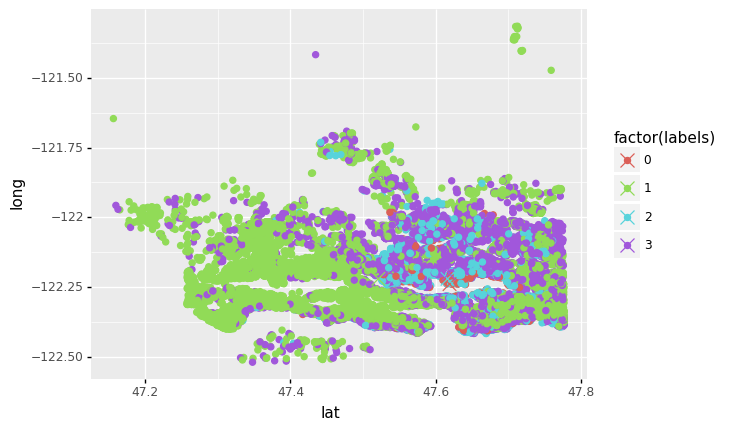

<ggplot: (8781850347990)>

In [ ]:
# Plot de los datos y centro de los clusters
ggplot(tempDF) + aes(x="lat", y="long",color="factor(labels)") + geom_point(size=2) + geom_point(data=tempDF2,shape="x",size=5)

In [ ]:
#escalando datos y econtrando k
from sklearn.preprocessing import StandardScaler

# Creamos un objeto de la clase StandardScaler
scaler = StandardScaler() 

#Transformamos los datos (media 0, varianza 1)
scaled_features = scaler.fit_transform(df) 

In [ ]:
# Aplicando el mismo proceso anterior para buscar el número de K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

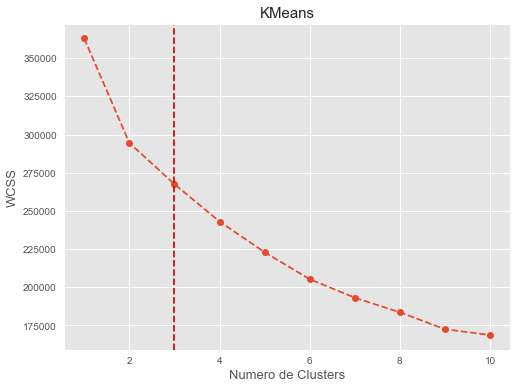

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), sse, marker='o',linestyle='--')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('KMeans',fontsize=15)
plt.xlabel('Numero de Clusters',fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()

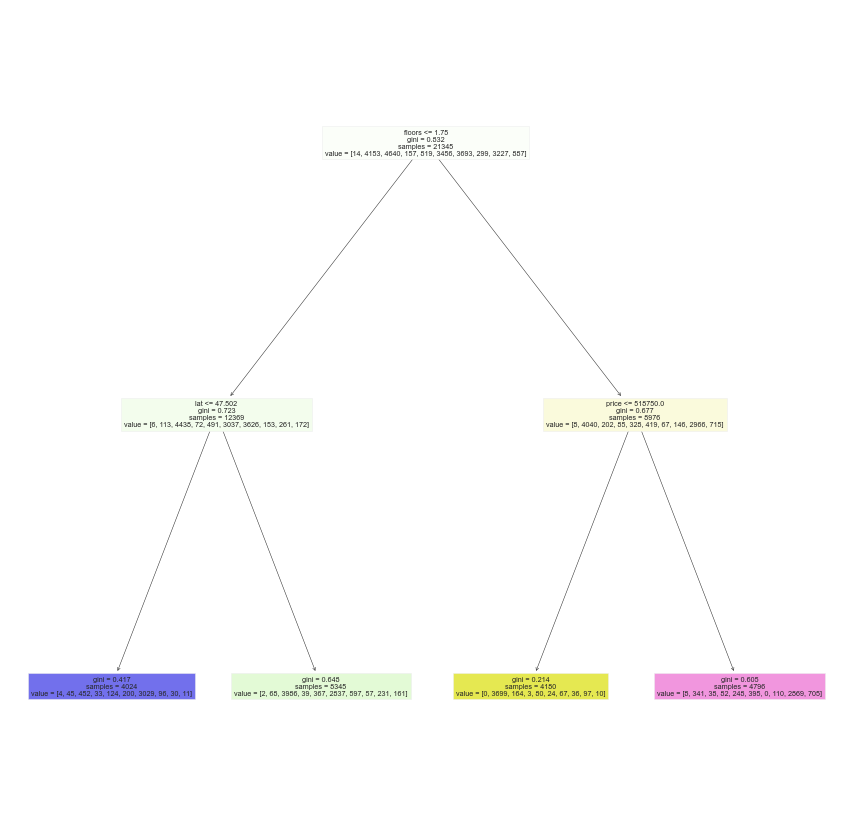

In [ ]:
#Arbol de Clasificacion
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(tempDF, kmeans.labels_.astype("str"))

plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names = df.columns,filled=True) 
plt.show()


PCA

In [ ]:
df11=df.drop(columns=["labels"])

In [ ]:
#entrenamiento de modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df11)

#se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df11.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', "PC5", "PC6", "PC7", "PC8", "PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16"]
)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
PC1,3.339471e-01,2.642044e-01,3.660669e-01,0.419925,8.276391e-02,2.535175e-01,7.628350e-02,1.454898e-01,-8.414120e-02,3.902694e-01,0.405614,0.111594,2.274300e-01,2.220847e-02,3.629383e-02,1.425677e-01
PC2,2.895413e-01,8.452833e-02,-1.564160e-02,0.114197,-3.831600e-02,-2.818212e-01,2.308118e-01,3.378753e-01,3.000923e-01,-6.769741e-03,-0.108961,0.439827,-4.257237e-01,1.883455e-01,1.920144e-01,-3.136943e-01
PC3,-1.505577e-01,3.408566e-01,3.136945e-02,0.159576,2.894707e-01,-3.444226e-01,-3.299325e-01,-1.960924e-01,3.727686e-01,-7.646211e-02,0.014628,0.302941,-2.079969e-02,-2.417401e-01,-3.203373e-01,2.944408e-01
PC4,-3.897293e-02,-1.964773e-01,-1.029003e-01,-0.044359,4.345335e-01,-1.013700e-01,5.180728e-01,4.140158e-01,-2.220603e-02,-5.105738e-02,0.014818,-0.119478,5.596754e-02,8.674119e-02,-4.554245e-01,2.697325e-01
PC5,5.094379e-02,-2.195188e-02,-3.146550e-02,0.027938,4.462168e-01,-3.611046e-02,-2.681724e-01,-2.219889e-01,-1.372259e-01,-1.856026e-02,0.095576,-0.120668,-2.644402e-01,7.118008e-01,1.742479e-01,1.540156e-01
PC6,2.287104e-01,-2.983541e-01,-1.671799e-01,-0.028952,4.097668e-01,-4.110501e-02,-7.074654e-03,-9.873156e-03,2.118460e-01,1.161594e-01,0.056461,-0.165361,-4.957065e-02,-4.795531e-01,5.571233e-01,1.685954e-01
PC7,-8.510420e-02,-6.333125e-02,2.626493e-02,0.017278,1.922633e-01,-2.584421e-01,-7.204856e-02,9.968447e-02,-6.837280e-01,-1.563958e-02,-0.241426,0.486623,2.309332e-01,-1.111079e-01,1.991775e-01,2.662379e-02
PC8,-3.236976e-02,-1.087447e-01,9.857093e-02,-0.000882,4.571606e-01,2.613242e-01,-3.118932e-01,1.255462e-01,-2.256461e-02,7.035695e-02,0.008926,-0.018495,-6.099232e-02,-1.601202e-01,-2.818551e-01,-6.873155e-01
PC9,-1.089353e-01,5.901960e-01,4.002751e-03,-0.029895,2.553023e-01,8.721307e-02,4.880968e-01,-3.069566e-01,-1.834267e-01,-2.581903e-01,0.037433,-0.131776,-1.494116e-01,-1.633939e-01,1.656603e-01,-1.952112e-01
PC10,-1.246485e-01,-2.054465e-01,3.927314e-01,-0.123086,1.752235e-01,3.284763e-01,2.262174e-01,-2.426150e-01,3.770276e-01,-1.124695e-01,-0.308133,0.320698,3.371428e-01,1.927040e-01,1.430542e-01,1.932714e-02


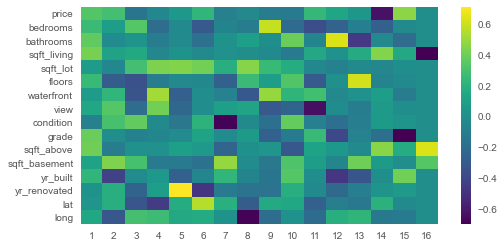

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df11.columns)), df11.columns)
plt.xticks(range(len(df11.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.02738123e-01 1.39651215e-01 8.32913552e-02 7.92119360e-02
 6.39799970e-02 6.16335169e-02 5.29082376e-02 4.52750958e-02
 3.82529879e-02 3.48804470e-02 3.16751628e-02 2.10958208e-02
 1.97803171e-02 1.36540811e-02 1.19717069e-02 5.47099938e-33]


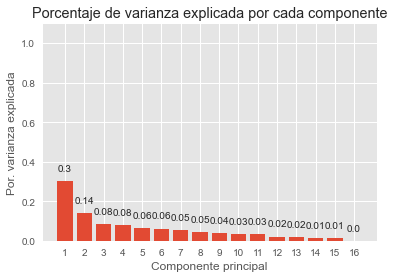

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df11.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.30273812 0.44238934 0.52568069 0.60489263 0.66887263 0.73050614
 0.78341438 0.82868948 0.86694246 0.90182291 0.93349807 0.95459389
 0.97437421 0.98802829 1.         1.        ]


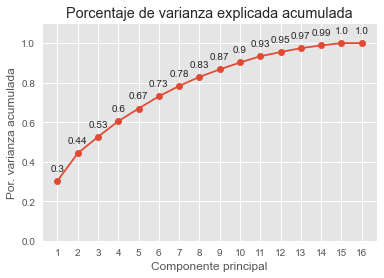

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df11.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df11.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
#pca de 12 componentes
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(scaled_features)

tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
tempData["labels"]=kmeans.labels_

tempData

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,labels
0,-2.351391,-0.423331,0.171331,0.301790,-0.114479,0.102037,0.331043,-0.034362,0.082949,0.229080,0.834671,0.160454,2
1,0.621230,1.368959,-2.007618,1.390870,0.733265,4.139836,-0.346802,-0.420770,-0.474949,-0.058890,-1.159626,0.080522,4
2,-3.432337,0.135978,-0.887776,0.653579,0.751621,-0.169605,0.846804,-0.300469,0.685717,-0.138593,0.348453,-0.426428,2
3,-0.078490,2.233191,0.079395,-1.942015,-0.843164,-0.454154,-0.853395,0.425776,-0.630263,0.324749,-1.870740,0.494050,5
4,-0.327569,-1.092469,0.145642,0.111154,0.277440,-0.169607,0.687081,-1.003542,0.608876,-0.743143,0.362820,-0.095215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21340,3.405928,0.367000,-0.903701,-0.383158,-1.268855,-0.055569,0.672974,0.993932,-0.478954,0.268776,-0.662768,1.169817,8
21341,-0.502200,-1.029640,-0.815719,1.020494,-1.202646,-0.290088,0.449314,1.098481,0.210027,-0.116602,-0.806081,0.081899,1
21342,0.195060,-1.759093,-1.687251,1.433254,-0.959292,-0.388805,0.016400,1.126687,0.544790,0.060530,-1.391329,-0.795860,1
21343,0.747946,-1.510460,-0.168777,0.462939,-1.347741,0.070879,-0.108791,0.931399,0.355730,0.502380,-0.018512,-0.032269,1


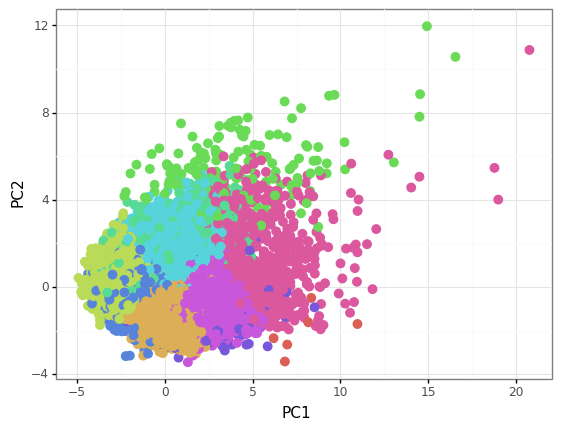

<ggplot: (8781480075213)>

In [ ]:
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=False, size=3)+theme_bw()

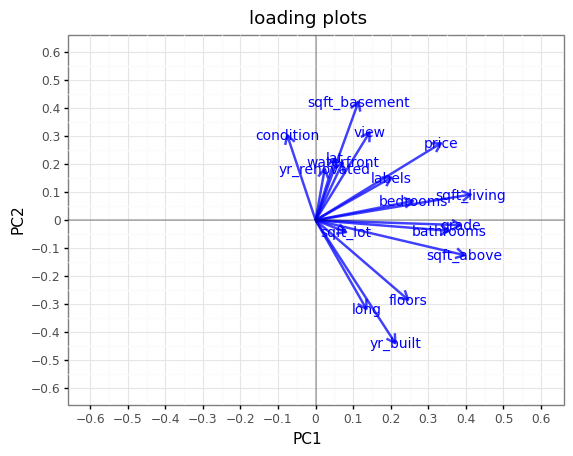

<ggplot: (8781530759108)>

In [ ]:
# Analizando los componentes
datapc = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
datapc['varNames']=df.columns
datapc
(ggplot(datapc)+
  theme_bw()+
  labs(title="loading plots")+
  geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")+
  geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")+
  scale_x_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  geom_hline(yintercept = 0, size=.2)+
  geom_vline(xintercept = 0, size=.2)+
  coord_cartesian([-0.6,0.6],[-0.6,0.6])
)

Eps usado: 1.0
Número de clusters encontrados: 2
Número de outliers encontrados: 2
Eps usado: 0.5
Número de clusters encontrados: 2
Número de outliers encontrados: 4
Eps usado: 0.3333333333333333
Número de clusters encontrados: 3
Número de outliers encontrados: 6
Eps usado: 0.25
Número de clusters encontrados: 3
Número de outliers encontrados: 9
Eps usado: 0.2
Número de clusters encontrados: 3
Número de outliers encontrados: 11
Eps usado: 0.16666666666666666
Número de clusters encontrados: 6
Número de outliers encontrados: 14
Eps usado: 0.14285714285714285
Número de clusters encontrados: 9
Número de outliers encontrados: 27
Eps usado: 0.125
Número de clusters encontrados: 18
Número de outliers encontrados: 38
Eps usado: 0.1111111111111111
Número de clusters encontrados: 24
Número de outliers encontrados: 78
Eps usado: 0.1
Número de clusters encontrados: 27
Número de outliers encontrados: 108


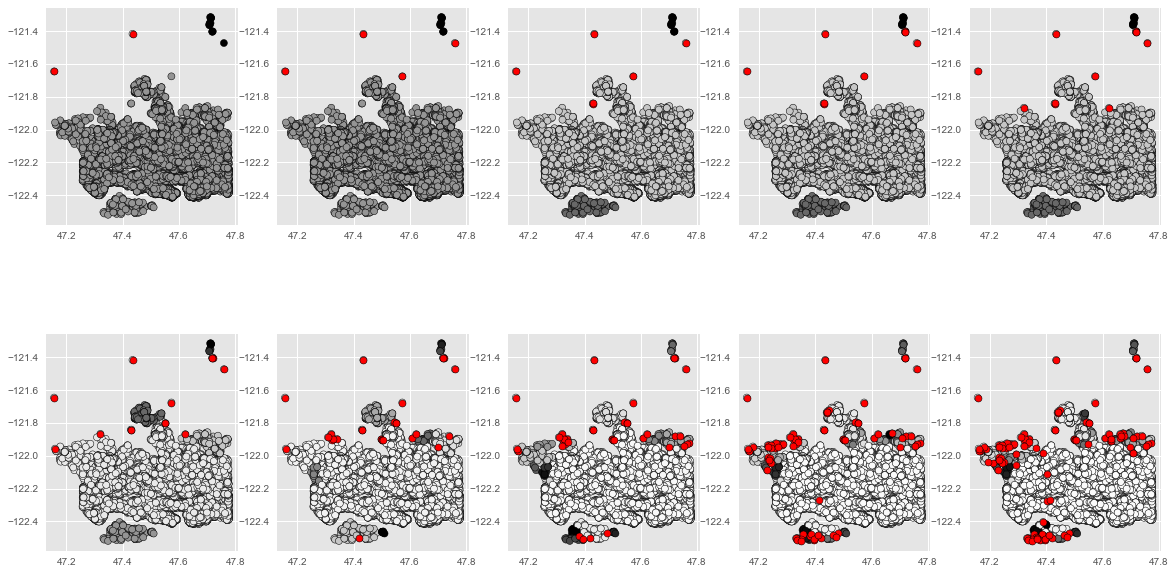

In [ ]:
#DbScan
df2=df
df3 = pd.DataFrame(df,columns=['lat','long'])
X=df3.to_numpy()
x_scaled=scale(X)

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
i = 1 

for x in range(10, 0, -1):
    eps = 1/(11-x)
    modelo_dbscan = DBSCAN( eps = eps, min_samples  = 5, metric       = 'euclidean',)
    modelo_dbscan.fit(x_scaled)
    # Clasificación
    labels = modelo_dbscan.labels_
    ax = fig.add_subplot(2, 5, i)
    ax.scatter(x = X[:, 0],y = X[:, 1], c = labels, marker    = 'o',edgecolor = 'black')
    # Los outliers se identifican con el label -1
    ax.scatter(x = X[labels == -1, 0],y = X[labels == -1, 1], c = 'red',marker    = 'o',edgecolor = 'black',label = 'outliers')

    # Número de clusters y observaciones "outliers"
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise    = list(labels).count(-1)
    print(f'Eps usado: {eps}')
    print(f'Número de clusters encontrados: {n_clusters}')
    print(f'Número de outliers encontrados: {n_noise}')
    i += 1


<Figure size 360x360 with 0 Axes>

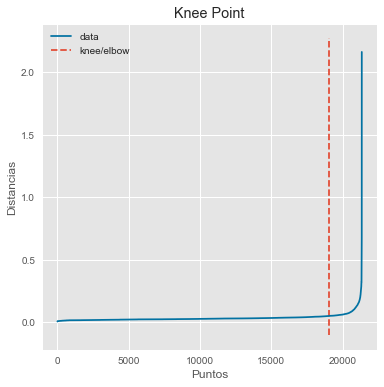

In [ ]:
# Entreno un KNN para encontrar el eps optimo
nearest_neighbors = NearestNeighbors(n_neighbors = 11)
neighbors = nearest_neighbors.fit(x_scaled)
distances, indices = neighbors.kneighbors(x_scaled)

distances = np.sort(distances[:, 10], axis = 0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction = 'increasing', interp_method = 'polynomial')
plt.figure(figsize = (5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancias")
plt.show()

# Sin embargo, la visualizacion no dice mucho porque no entrega
# un punto, sino un posible rango de valores para eps.

In [ ]:
# Epsilon Optimo
distances[knee.knee]

0.048912533691209244

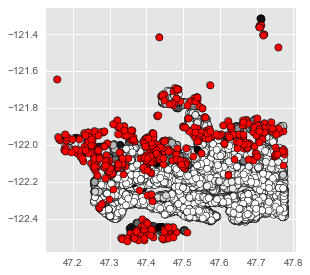

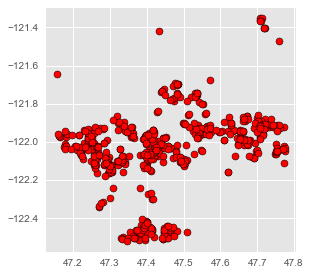

Eps usado: 0.048912533691209244
Número de clusters encontrados: 78
Número de outliers encontrados: 526


In [ ]:
eps = distances[knee.knee]
modelo_dbscan = DBSCAN( eps = eps, min_samples  = 5, metric       = 'euclidean',)
modelo_dbscan.fit(x_scaled)
# Clasificación
labels = modelo_dbscan.labels_
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.scatter(x = X[:, 0],y = X[:, 1], c = labels, marker    = 'o',edgecolor = 'black')
ax.scatter(x = X[labels == -1, 0],y = X[labels == -1, 1], c = 'red',marker    = 'o',edgecolor = 'black',label = 'outliers')
plt.show()
# Los outliers se identifican con el label -1
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.scatter(x = X[labels == -1, 0],y = X[labels == -1, 1], c = 'red',marker    = 'o',edgecolor = 'black',label = 'outliers')
#ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize = 25, ha = "center")
plt.show()

# Número de clusters y observaciones "outliers"
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)
print(f'Eps usado: {eps}')
print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')


In [ ]:
#dbscan 2

# Configuracion Entorno Plot
sns.set_style('dark')
sns.set(rc={'figure.figsize':(5.27,5.27)})
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21345 entries, 0 to 21611
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21345 non-null  float64
 1   bedrooms       21345 non-null  int64  
 2   bathrooms      21345 non-null  int64  
 3   sqft_living    21345 non-null  int64  
 4   sqft_lot       21345 non-null  int64  
 5   floors         21345 non-null  float64
 6   waterfront     21345 non-null  int64  
 7   view           21345 non-null  int64  
 8   condition      21345 non-null  int64  
 9   grade          21345 non-null  int64  
 10  sqft_above     21345 non-null  int64  
 11  sqft_basement  21345 non-null  int64  
 12  yr_built       21345 non-null  int64  
 13  yr_renovated   21345 non-null  int64  
 14  lat            21345 non-null  float64
 15  long           21345 non-null  float64
 16  labels         21345 non-null  int32  
dtypes: float64(4), int32(1), int64(12)
memory usage: 2

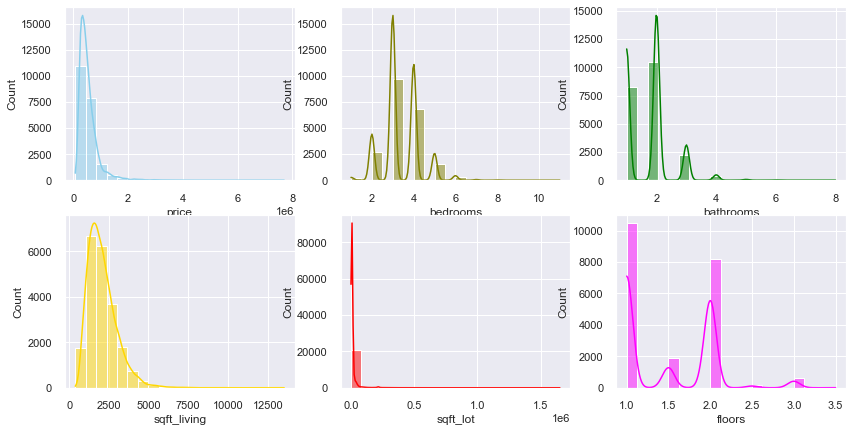

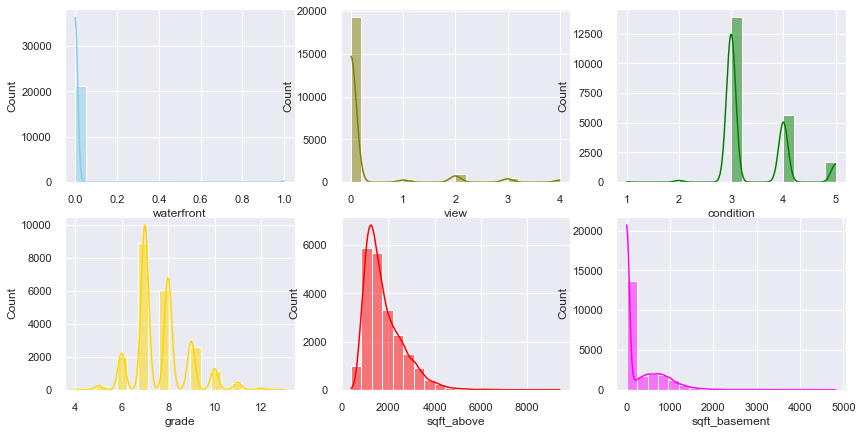

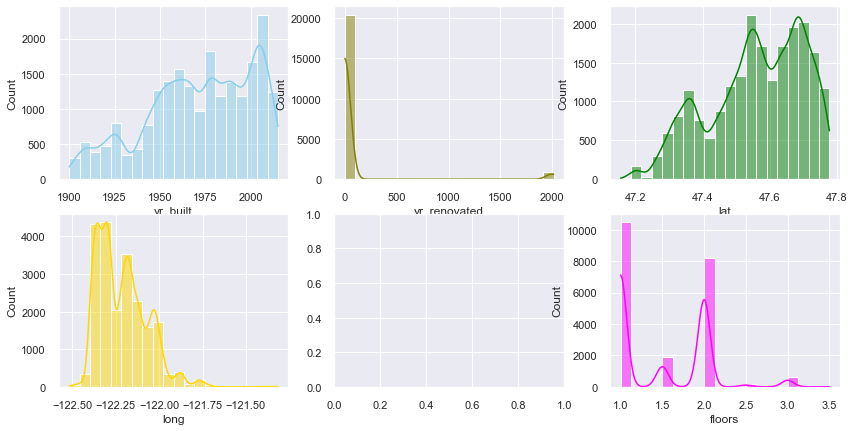

In [ ]:
# Histogramas de las variables 
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.histplot(data=df, x="price", kde=True, color="skyblue", ax=axs[0, 0], bins=20)
sns.histplot(data=df, x="bedrooms", kde=True, color="olive", ax=axs[0, 1], bins=20)
sns.histplot(data=df, x="bathrooms", kde=True, color="green", ax=axs[0, 2], bins=20)
sns.histplot(data=df, x="sqft_living", kde=True, color="gold", ax=axs[1, 0], bins=20)
sns.histplot(data=df, x="sqft_lot", kde=True, color="red", ax=axs[1, 1], bins=20)
sns.histplot(data=df, x="floors", kde=True, color="magenta", ax=axs[1, 2], bins=20)
plt.show()
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.histplot(data=df, x="waterfront", kde=True, color="skyblue", ax=axs[0, 0], bins=20)
sns.histplot(data=df, x="view", kde=True, color="olive", ax=axs[0, 1], bins=20)
sns.histplot(data=df, x="condition", kde=True, color="green", ax=axs[0, 2], bins=20)
sns.histplot(data=df, x="grade", kde=True, color="gold", ax=axs[1, 0], bins=20)
sns.histplot(data=df, x="sqft_above", kde=True, color="red", ax=axs[1, 1], bins=20)
sns.histplot(data=df, x="sqft_basement", kde=True, color="magenta", ax=axs[1, 2], bins=20)
plt.show()
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.histplot(data=df, x="floors", kde=True, color="magenta", ax=axs[1, 2], bins=20)
sns.histplot(data=df, x="yr_built", kde=True, color="skyblue", ax=axs[0, 0], bins=20)
sns.histplot(data=df, x="yr_renovated", kde=True, color="olive", ax=axs[0, 1], bins=20)
sns.histplot(data=df, x="lat", kde=True, color="green", ax=axs[0, 2], bins=20)
sns.histplot(data=df, x="long", kde=True, color="gold", ax=axs[1, 0], bins=20)
plt.show()

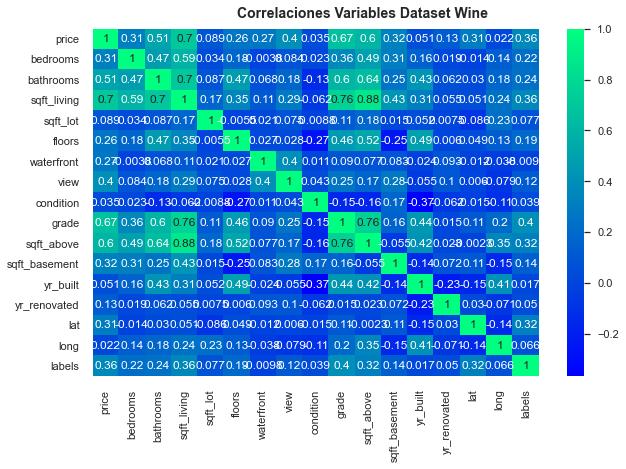

In [ ]:
# Análisis de Correlación
fig, ax = plt.subplots(1, 1, figsize=(10,6))
corr = df.corr()
sns.heatmap(corr,ax = ax, cmap='winter',annot=True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Variables Dataset Wine', fontsize=14,fontweight='bold')
plt.show()

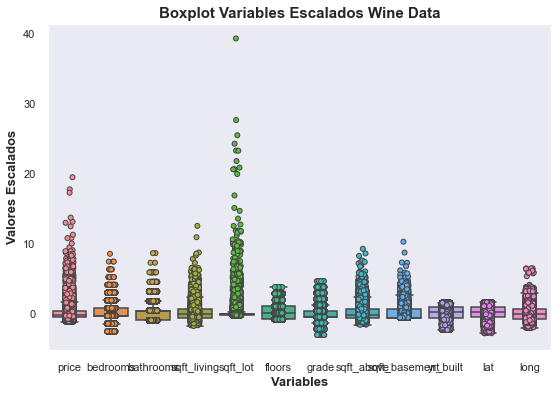

In [ ]:
# Escalamiento de datos
df12=df.drop(["waterfront", "view", "condition","yr_renovated","labels"], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df12)
# Boxplot Datos Escalados 
sns.set_style('dark')
df12 = pd.DataFrame(scaled_features, columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long'])
plt.figure(figsize=(9,6))
ax = sns.stripplot(x="variable", y="value", data=pd.melt(df12), jitter=True, split=True,
              linewidth = 1, edgecolor='gray')
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df12),fliersize=0)
ax.set_xlabel("Variables", fontsize=13,fontweight='bold')
ax.set_ylabel("Valores Escalados", fontsize=13,fontweight='bold')
ax.set_title("Boxplot Variables Escalados Wine Data", fontsize=15,fontweight='bold')
plt.show()

<Figure size 360x360 with 0 Axes>

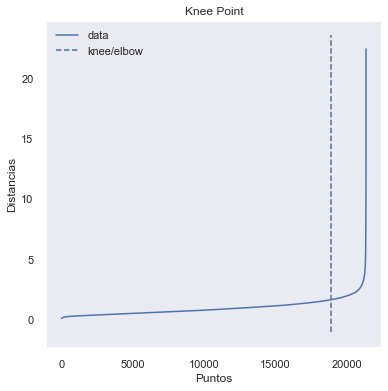

In [ ]:
X=df12.to_numpy()
x_scaled=scale(X)
# Entreno un KNN para encontrar el eps optimo
nearest_neighbors = NearestNeighbors(n_neighbors = 11)
neighbors = nearest_neighbors.fit(x_scaled)
distances, indices = neighbors.kneighbors(x_scaled)

distances = np.sort(distances[:, 10], axis = 0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction = 'increasing', interp_method = 'polynomial')
plt.figure(figsize = (5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancias")
plt.show()

# Sin embargo, la visualizacion no dice mucho porque no entrega
# un punto, sino un posible rango de valores para eps.

In [ ]:
# Epsilon Optimo
distances[knee.knee]

1.6567571491090907

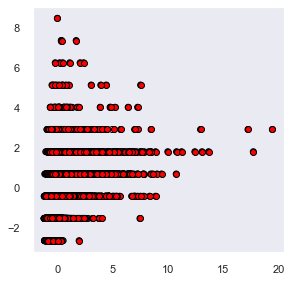

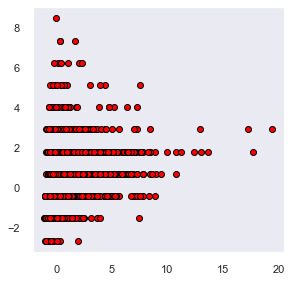

Eps usado: 1.6567571491090907
Número de clusters encontrados: 5
Número de outliers encontrados: 999


In [ ]:
eps = distances[knee.knee]
modelo_dbscan = DBSCAN( eps = eps, min_samples  = 5, metric       = 'euclidean',)
modelo_dbscan.fit(x_scaled)
# Clasificación
labels = modelo_dbscan.labels_
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.scatter(x = X[:, 0],y = X[:, 1], c = labels, marker    = 'o',edgecolor = 'black')
ax.scatter(x = X[labels == -1, 0],y = X[labels == -1, 1], c = 'red',marker    = 'o',edgecolor = 'black',label = 'outliers')
plt.show()
# Los outliers se identifican con el label -1
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.scatter(x = X[labels == -1, 0],y = X[labels == -1, 1], c = 'red',marker    = 'o',edgecolor = 'black',label = 'outliers')
#ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize = 25, ha = "center")
plt.show()

# Número de clusters y observaciones "outliers"
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)
print(f'Eps usado: {eps}')
print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')


In [ ]:
# Creando el Objeto y Aplicando PCA 
pca = PCA(n_components = 2)
pca.fit(scaled_features)
tmpData = pca.transform(scaled_features)
tmpData = pd.DataFrame(tmpData, columns=["PC1", "PC2"])
tmpData["labels"] = modelo_dbscan.labels_

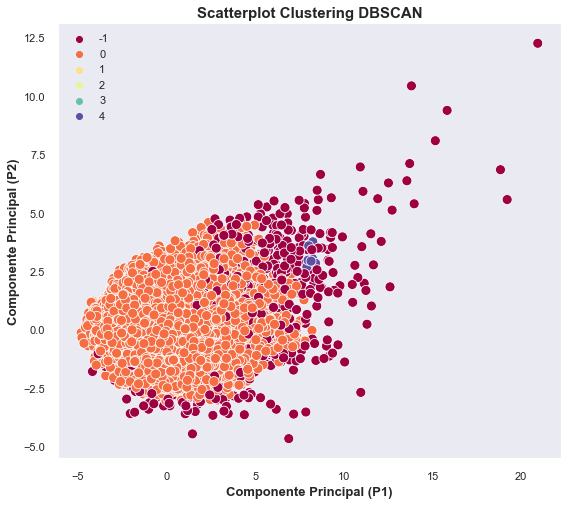

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.scatterplot(data = tmpData, x="PC1", y="PC2", hue="labels", palette="Spectral", s=100)
ax.set_xlabel("Componente Principal (P1)", fontsize=13,fontweight='bold')
ax.set_ylabel("Componente Principal (P2)", fontsize=13,fontweight='bold')
ax.set_title("Scatterplot Clustering DBSCAN", fontsize=15,fontweight='bold')
ax.legend() 
plt.show()